# Latar Belakang
Dalam era digital saat ini, perusahaan yang bergerak di bidang Software as a Service (SaaS) mengandalkan data penjualan sebagai dasar pengambilan keputusan strategis. Data penjualan yang terekam mencakup berbagai dimensi, mulai dari produk yang dijual, pelanggan yang membeli, wilayah geografis, hingga performa keuntungan dan diskon.

Data historis penjualan SaaS dapat membantu mengidentifikasi pola perilaku konsumen, efektivitas strategi harga dan diskon, serta segmentasi pasar yang paling menguntungkan. Namun, tanpa analisis yang sistematis, potensi insight dari data ini bisa terlewatkan. Oleh karena itu, diperlukan analisis menyeluruh terhadap data penjualan untuk mendukung optimalisasi strategi bisnis.  


## Pernyataan Masalah
Berdasarkan latar belakang tersebut, berikut beberapa pertanyaan penelitian atau pernyataan masalah yang dapat dikembangkan:
1. Siapa penyumbang pendapatan terbesar beserta hasil analisisnya?
2. Produk apa yang paling banyak dijual dan paling menguntungkan?
3. Bagaimana tren penjualan produk SaaS dari waktu ke waktu?
4. Wilayah geografis mana yang menghasilkan penjualan dan profit terbesar?
5. Customer Value: Siapa pelanggan VIP dengan kontribusi tinggi?

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015). 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset saas-sales.csv, yaitu:  

| No | Kolom          | Tipe Data | Penjelasan                                                                                                       |
| -- | -------------- | --------- | ---------------------------------------------------------------------------------------------------------------- |
| 1  | `Row ID`       | `int64`   | ID unik untuk setiap baris transaksi. Umumnya hanya digunakan sebagai indeks.                                    |
| 2  | `Order ID`     | `object`  | Kode unik pesanan, mencakup informasi regional dan tahun (misalnya `EMEA-2022-152156`).                          |
| 3  | `Order Date`   | `object`  | Tanggal pesanan dilakukan, dalam format MM/DD/YYYY.                                                              |
| 4  | `Date Key`     | `int64`   | Representasi tanggal dalam bentuk integer `YYYYMMDD`, digunakan untuk analisis waktu secara numerik.             |
| 5  | `Contact Name` | `object`  | Nama kontak yang bertanggung jawab atas pesanan (perwakilan pelanggan).                                          |
| 6  | `Country`      | `object`  | Negara tempat pelanggan berada.                                                                                  |
| 7  | `City`         | `object`  | Kota tempat pelanggan berada.                                                                                    |
| 8  | `Region`       | `object`  | Wilayah penjualan, seperti `EMEA` (Europe, Middle East, Africa), `AMER`, atau `APAC`.                            |
| 9  | `Subregion`    | `object`  | Subdivisi dari `Region`, seperti `NAMER`, `EU-WEST`, `UKIR`, dll.                                                |
| 10 | `Customer`     | `object`  | Nama perusahaan atau organisasi pelanggan.                                                                       |
| 11 | `Customer ID`  | `int64`   | ID unik untuk setiap pelanggan. Bisa digunakan untuk analisis loyalitas atau segmentasi pelanggan.               |
| 12 | `Industry`     | `object`  | Industri tempat pelanggan beroperasi, seperti `Finance`, `Energy`, `Retail`, dsb.                                |
| 13 | `Segment`      | `object`  | Segmentasi pelanggan berdasarkan skala bisnis, seperti `SMB` (Small-Medium Business), `Enterprise`, `Strategic`. |
| 14 | `Product`      | `object`  | Nama produk SaaS yang dijual, seperti `FinanceHub`, `Marketing Suite`, dll.                                      |
| 15 | `License`      | `object`  | Kode unik untuk lisensi produk, berbeda tiap baris meski produknya sama.                                         |
| 16 | `Sales`        | `float64` | Nilai penjualan (dalam satuan mata uang, misalnya dolar) dari produk tersebut.                                   |
| 17 | `Quantity`     | `int64`   | Jumlah unit lisensi yang dibeli pada transaksi tersebut.                                                         |
| 18 | `Discount`     | `float64` | Besar diskon yang diberikan pada transaksi tersebut (misalnya 0.2 artinya 20%).                                  |
| 19 | `Profit`       | `float64` | Laba bersih dari transaksi tersebut, setelah dikurangi diskon dan biaya lainnya. Bisa bernilai negatif (rugi).   |

Sales = Harga total yang dibayar pelanggan sebelum dikurangi diskon.
Profit sangat dipengaruhi oleh Discount, sehingga penting dianalisis bersama-sama.
Kolom Order Date dan Date Key dapat dikonversi ke format datetime untuk analisis time series seperti tren bulanan atau tahunan.
Kombinasi kolom Region, Segment, dan Industry sangat cocok untuk membuat dashboard bisnis atau heatmap performa penjualan.

Berikut 5 baris teratas dan terbawah dari dataset saas-sales.

In [8]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset sales-saas.

In [10]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

Dari hasil diatas, dapat disimpulkan bahwa:
1. Dataset berisi 9.994 baris dan 19 kolom
2. Tidak ada missing value
3. Perlu dilakukan konversi kolom tanggal
4. Siap untuk analisis eksplorasi lebih lanjut (EDA)


In [14]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Penjelasan untuk Bagian 1: df.describe() → Statistik Deskriptif untuk Kolom Numerik:
1. Sales dan Profit punya rentang nilai yang besar → ada transaksi besar & kecil
2. Ada transaksi rugi (Profit negatif hingga -6.599) → perlu analisis kenapa
3. Diskon bervariasi antara 0 hingga 80%
4. Quantity rata-rata sekitar 4 unit

Penjelasan untuk Bagian 2: df.describe(include='object') → Statistik Deskriptif untuk Kolom Kategorikal
1. Ada lebih dari 5.000 transaksi unik (Order ID) → dataset mencerminkan transaksi aktual
2. Leonard Kelly adalah kontak pelanggan paling sering muncul (37 transaksi)
3. Negara paling banyak transaksi: United States (2001 baris)
4. Kota paling banyak transaksi: London (922 baris)
5. Jumlah produk yang dijual: 14 jenis
6. Jumlah lisensi unik: 9994 → tiap transaksi punya lisensi berbeda

In [15]:
pd.set_option('display.max_colwidth', 0)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Berikut secara umum, kita bisa melihat bahwa:

| Column Name | Number of Unique | Unique Sample                                 |
| ----------- | ---------------- | --------------------------------------------- |
| Row ID      | 9994             | \[1, 2, 3, ..., 9994]                         |
| Order ID    | 5009             | \['EMEA-2022-152156', ..., 'APAC-2023-...']   |
| Order Date  | 1237             | \['11/9/2022', '6/13/2022', ..., '...']       |
| Country     | 48               | \['Ireland', 'United States', 'Germany', ...] |
| Region      | 3                | \['EMEA', 'AMER', 'APAC']                     |
| Industry    | 10               | \['Energy', 'Finance', 'Retail', ...]         |
| Product     | 14               | \['Marketing Suite', 'FinanceHub', ...]       |
| License     | 9994             | \['16GRM07R1K', 'QLIW57KZUV', ..., ...]       |
| Discount    | 18               | \[0.0, 0.2, 0.3, 0.4, ..., 0.8]               |
| Profit      | 7280             | \[-6599.978, 2.5164, ..., 8399.976]           |

1. Kolom yang sangat unik:
* Row ID dan License: semuanya unik → digunakan sebagai identifikasi individual
* Order ID: 5009 unik → ada banyak pesanan
2. Kolom tanggal (Order Date) punya 1237 tanggal unik → cocok untuk analisis time series
3. Kolom kategorikal terbatas:
* Region: hanya 3 jenis (EMEA, AMER, APAC)
* Segment: 3 jenis (SMB, Strategic, Enterprise)
* Industry: 10 jenis → cocok untuk analisis per sektor
4. Kolom diskon (Discount) hanya punya 18 nilai berbeda → bisa dibuat grafik distribusi
5. Country, City, dan Customer punya banyak variasi → cocok untuk segmentasi geografis atau pelanggan

### Missing Value

In [16]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Kesimpulan
1. Tidak ada missing value di file SaaS-Sales.csv
2. Dataset siap untuk dianalisis langsung tanpa perlu imputasi data hilang
3. Kita bisa langsung masuk ke tahap EDA (Exploratory Data Analysis), visualisasi, atau analisis lanjutan seperti clustering, prediksi, segmentasi pelanggan, dll.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [20]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,Row ID,int64,0,9994,"[2111, 1450]"
1,Order ID,object,0,5009,"[AMER-2022-110730, EMEA-2023-108322]"
2,Order Date,object,0,1237,"[8/24/2021, 4/27/2022]"
3,Date Key,int64,0,1237,"[20210316, 20220525]"
4,Contact Name,object,0,793,"[David Lee, Amelia Campbell]"
5,Country,object,0,48,"[Colombia, Philippines]"
6,City,object,0,262,"[Berlin, Sapporo]"
7,Region,object,0,3,"[AMER, EMEA]"
8,Subregion,object,0,12,"[NAMER, EU]"
9,Customer,object,0,99,"[Fannie Mae, Samsung Electronics]"


Kesimpulan hasil analisis
| Temuan                                                           | Penjelasan                                                                  |
| ---------------------------------------------------------------- | --------------------------------------------------------------------------- |
|  **Tidak ada null/missing value**                              | Semua kolom memiliki nilai lengkap (`null = 0`)                             |
|  **Beberapa kolom sangat unik**                                | `Row ID`, `License`, `Order ID` punya banyak nilai unik — bersifat ID       |
|  **Kolom kategorikal seperti `Region`, `Industry`, `Segment`** | Memiliki jumlah nilai unik yang kecil → cocok untuk visualisasi kategorikal |
|  **Kolom numerik (`Sales`, `Discount`, `Profit`)**             | Cocok untuk analisis statistik dan korelasi                                 |
|  **Contoh nilai acak di setiap kolom**                         | Membantu mengenali struktur data nyata tanpa melihat seluruh dataset        |


# Data Analysis
RUMUSAN MASALAH: Siapa penyumbang pendapatan terbesar?

Top 10 pelanggan dengan total sales terbesar:
                Customer       Sales
0  Anthem                 55719.2100
1  Ford Motor             43893.0424
2  Allianz                42904.1670
3  Bank of America Corp.  41255.9471
4  Valero Energy          41220.4188
5  Lowes                  40360.1630
6  Tyson Foods            40326.3440
7  Allstate               39941.6400
8  AmerisourceBergen      39234.7610
9  BMW                    39083.7900


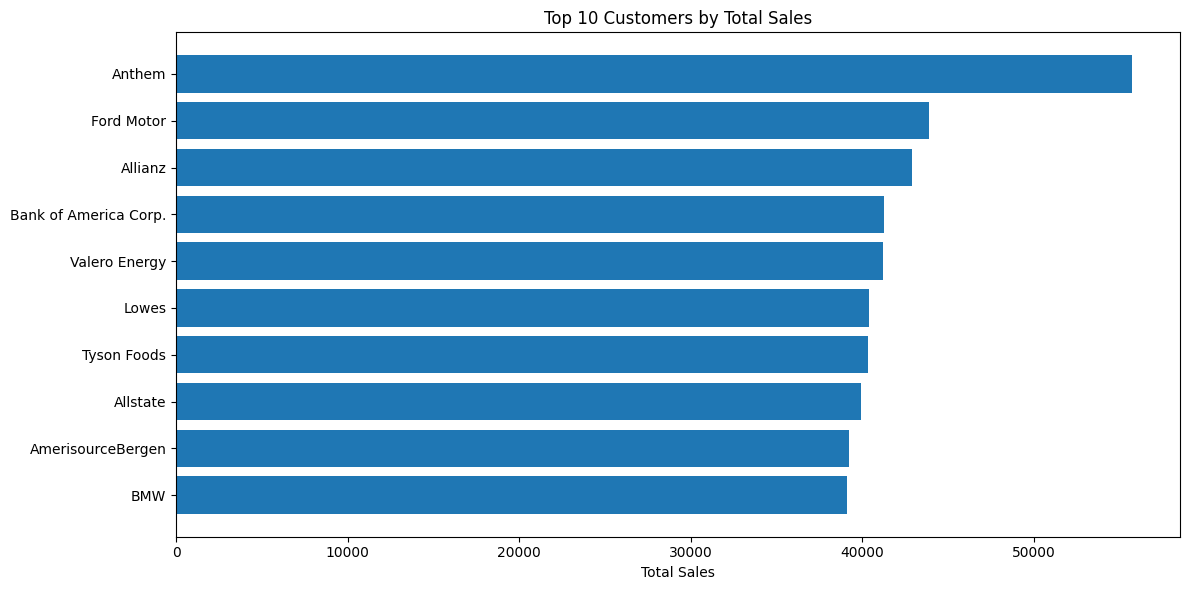

In [22]:
# Hitung total sales per pelanggan
top_customers = df.groupby('Customer')['Sales'].sum().sort_values(ascending=False).reset_index()

# Ambil 10 pelanggan teratas
top_10_customers = top_customers.head(10)

# Tampilkan hasil dalam bentuk tabel
print("Top 10 pelanggan dengan total sales terbesar:")
print(top_10_customers)

# Visualisasi (horizontal bar chart)
plt.figure(figsize=(12, 6))
plt.barh(top_10_customers['Customer'][::-1], top_10_customers['Sales'][::-1])
plt.xlabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.tight_layout()
plt.show()

Hasil:
1. Anthem adalah pelanggan dengan total penjualan (sales) tertinggi: $55.719
2. Diikuti oleh Ford Motor, Allianz, dan Bank of America Corp.

Wawasan:
Perusahaan besar dari sektor keuangan dan otomotif mendominasi pendapatan.

Fokus strategi retention bisa diarahkan pada pelanggan ini karena kontribusinya signifikan terhadap total revenue.

RUMUSAN MASALAH “Produk apa yang paling banyak dijual dan paling menguntungkan?”

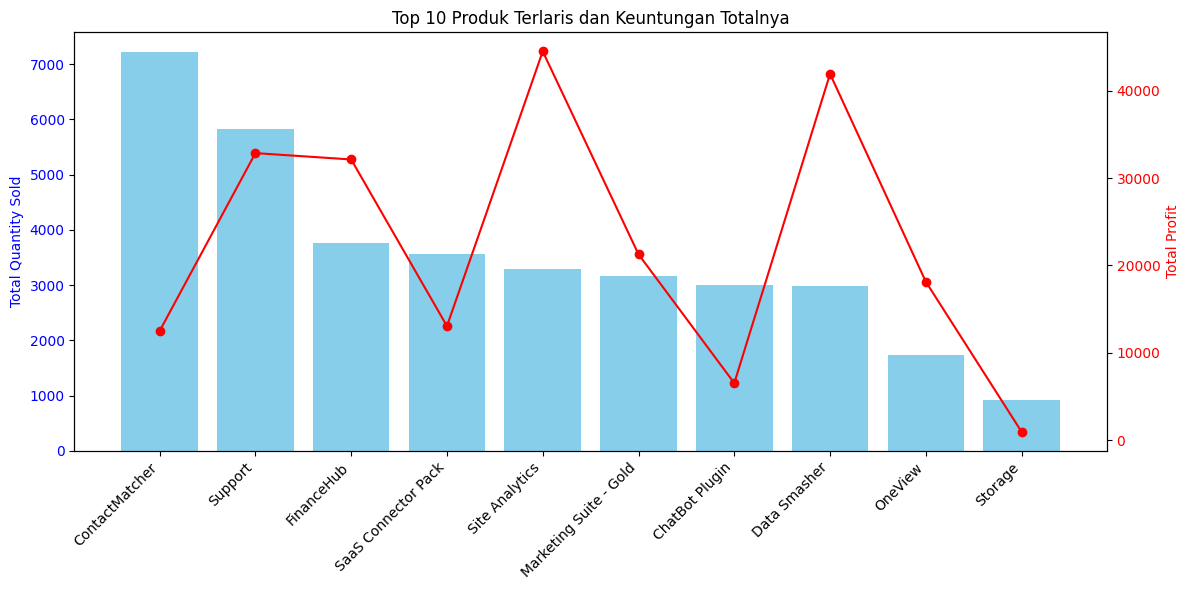

In [23]:
# Hitung total quantity (produk terjual) dan total profit per produk
product_stats = df.groupby('Product').agg(
    total_sold=('Quantity', 'sum'),
    total_profit=('Profit', 'sum')
).sort_values(by='total_sold', ascending=False).reset_index()

# Ambil 10 produk terlaris
top_10_products = product_stats.head(10)

# Visualisasi: Dual Axis Chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (jumlah produk terjual)
ax1.bar(top_10_products['Product'], top_10_products['total_sold'], label='Total Sold', color='skyblue')
ax1.set_ylabel('Total Quantity Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_10_products['Product'], rotation=45, ha='right')

# Line chart (profit)
ax2 = ax1.twinx()
ax2.plot(top_10_products['Product'], top_10_products['total_profit'], color='red', marker='o', label='Total Profit')
ax2.set_ylabel('Total Profit', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Judul dan tata letak
plt.title('Top 10 Produk Terlaris dan Keuntungan Totalnya')
fig.tight_layout()
plt.grid(False)
plt.show()


Produk dengan Penjualan Terbanyak (Quantity):
1. ContactMatcher — 7.215 unit
2. Support — 5.825 unit
3. FinanceHub — 3.756 unit

Produk dengan Keuntungan Tertinggi (Total Profit):
1. Site Analytics menghasilkan profit tertinggi meskipun hanya di urutan ke-5 dalam jumlah terjual.
2. Produk seperti Support dan FinanceHub juga memberikan kontribusi profit besar.

Visualisasi:
1. Batang biru menunjukkan jumlah unit terjual
2. Garis merah menunjukkan total profit

Dari grafik terlihat bahwa tidak semua produk yang paling banyak terjual memberikan profit terbesar — ini penting untuk strategi pricing dan promosi produk.

RUMUSAN MASALAH "Bagaimana tren penjualan produk SaaS dari waktu ke waktu?"

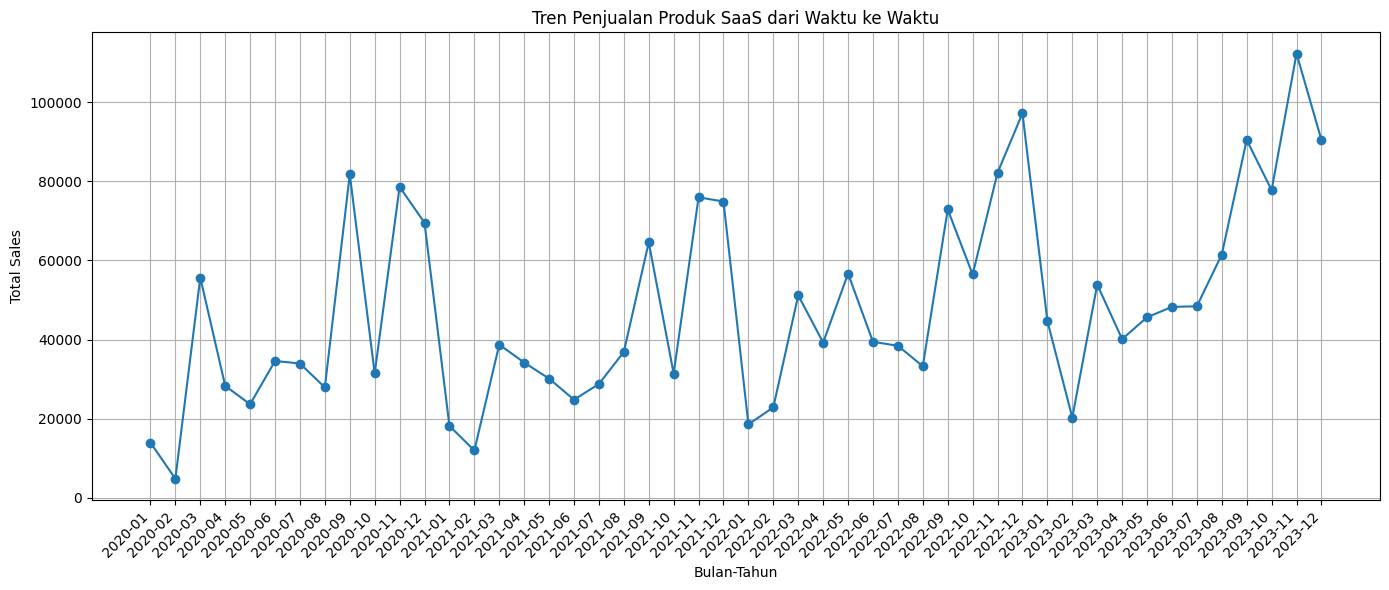

In [24]:
# Konversi kolom tanggal
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Tambahkan kolom bulan-tahun
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

# Hitung total sales per bulan
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Sales')
plt.title('Tren Penjualan Produk SaaS dari Waktu ke Waktu')
plt.tight_layout()
plt.grid(True)
plt.show()

Penjelasan Hasil:
1. Grafik menunjukkan pergerakan total penjualan setiap bulan dari Januari 2020 hingga akhir periode dataset.
2. Terlihat bahwa penjualan mengalami fluktuasi yang signifikan, dengan beberapa bulan memiliki lonjakan tinggi seperti Maret 2020.
3. Tren ini berguna untuk mengidentifikasi musim puncak (peak season) dan masa penurunan (off season).

PERNYATAAN MASALAH: Wilayah geografis mana yang menghasilkan penjualan dan profit terbesar?

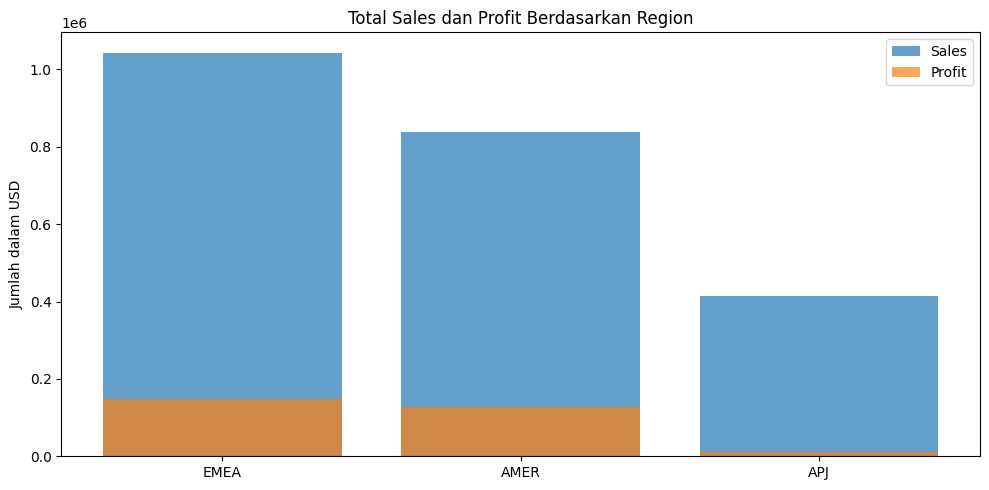

In [25]:
# Hitung total sales dan profit berdasarkan Region, Country, dan City
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()
country_summary = df.groupby('Country')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()
city_summary = df.groupby('City')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()

# Visualisasi Region
plt.figure(figsize=(10, 5))
plt.bar(region_summary['Region'], region_summary['Sales'], label='Sales', alpha=0.7)
plt.bar(region_summary['Region'], region_summary['Profit'], label='Profit', alpha=0.7)
plt.title('Total Sales dan Profit Berdasarkan Region')
plt.ylabel('Jumlah dalam USD')
plt.legend()
plt.tight_layout()
plt.show()

Hasil Temuan:
Berdasarkan Region:
Region dengan total penjualan dan profit tertinggi adalah EMEA (Europe, Middle East, Africa), diikuti oleh AMER dan APAC.

PERNYATAAN MASALAH: Customer Value: Siapa pelanggan VIP dengan kontribusi tinggi?

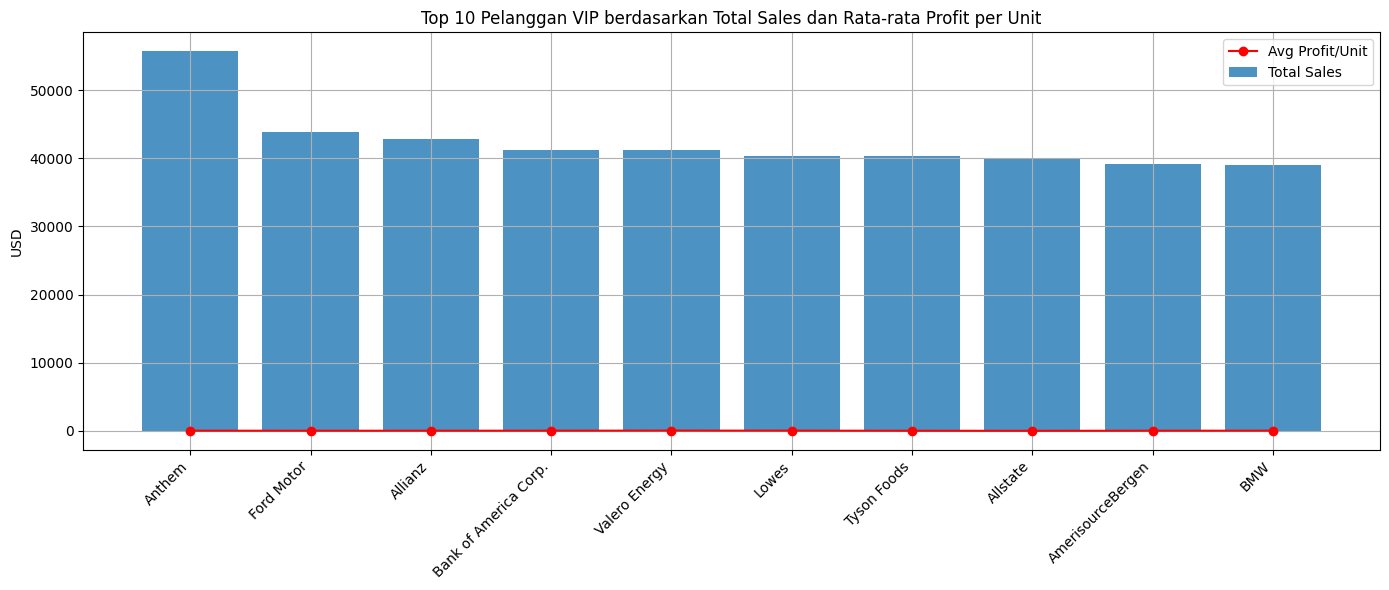

In [26]:
# Hitung total sales, total profit, dan total quantity untuk setiap pelanggan
customer_value = df.groupby('Customer').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    total_quantity=('Quantity', 'sum')
).sort_values(by='total_sales', ascending=False).reset_index()

# Tambahkan metrik tambahan: rata-rata profit per transaksi
customer_value['avg_profit_per_unit'] = customer_value['total_profit'] / customer_value['total_quantity']

# Ambil 10 pelanggan VIP berdasarkan total_sales
top_vip_customers = customer_value.head(10)

# Visualisasi
plt.figure(figsize=(14, 6))
plt.bar(top_vip_customers['Customer'], top_vip_customers['total_sales'], label='Total Sales', alpha=0.8)
plt.plot(top_vip_customers['Customer'], top_vip_customers['avg_profit_per_unit'], color='red', marker='o', label='Avg Profit/Unit')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Pelanggan VIP berdasarkan Total Sales dan Rata-rata Profit per Unit')
plt.ylabel('USD')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Kesimpulan:
| Customer                 | Total Sales | Total Profit | Avg Profit/Unit |
| ------------------------ | ----------- | ------------ | --------------- |
| **Anthem**               | \$55.719    | \$5.953      | \$11.38         |
| **Ford Motor**           | \$43.893    | \$4.011      | \$5.97          |
| **Allianz**              | \$42.904    | \$5.532      | \$7.80          |
| **Bank of America Corp** | \$41.256    | \$6.450      | \$12.17         |
| **Valero Energy**        | \$41.220    | \$10.309     | **\$24.66**    |
Valero Energy memiliki profit per unit tertinggi di antara pelanggan top → bisa jadi pelanggan prioritas untuk upselling atau loyalty program.